## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
    - Ans: 會。例如調整 max_depth 參數為2，則 petal width 特徵的重要性為 1 ，因為在決策樹進行分類的過程中沒用到其他任何特徵。
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [73]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [74]:
from sklearn import datasets, metrics, linear_model
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [75]:
boston = datasets.load_boston()
x = boston.data[:, np.newaxis, 5]
print(x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, boston.target, test_size=0.3, random_state=4)

reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=3)
regr = linear_model.LinearRegression()


reg_1.fit(x_train, y_train)
reg_2.fit(x_train, y_train)
regr.fit(x_train, y_train)

y1_pred = reg_1.predict(x_test)
y2_pred = reg_2.predict(x_test)
y_pred = regr.predict(x_test)

(506, 1)


In [76]:
# LinearRegression Model
# 回歸模型的參數值
print('Coefficients: ', regr.coef_)
# 使用 MSE預測值與實際值的差距
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))

Coefficients:  [8.96006106]
Mean squared error: 51.52


In [77]:
# DecisionTreeRegressor Model

# 使用 MSE計算預測值與實際值的差距
# DecisionTreeRegressor Model max_depth=2 
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y1_pred))
# DecisionTreeRegressor Model max_depth=3
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y2_pred))

Mean squared error: 51.25
Mean squared error: 46.18


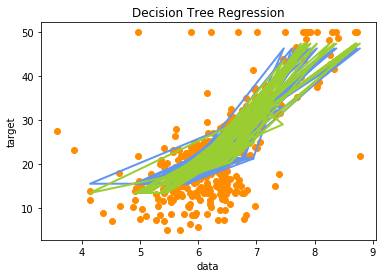

In [78]:
plt.figure()
plt.scatter(x, boston.target, c="darkorange", label="data")
plt.plot(x_test, y1_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y2_pred, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()